# Reggresion , Pandas , matplotlib

In [1]:
import pandas as pd

In [8]:
data=pd.read_csv(r"C:\Users\mynam\all the files for data science\Machine Learning using sklearn/Advertising.csv",index_col=0)

In [9]:
# How do you fix Unicodeescape codec Cannot decode bytes in position 2/3 truncated <UNK>Uxxxxxxxx escape?
# To Solve SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3:
# truncated \ UXXXXXXXX escape Error You just need to put r before your path string Just like this pandas
#. read_csv (r ”C: \ Users \ ssc \ Desktop \ account_summery. csv”)
# OR Just Use double quotes and forwardslash character 

In [10]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
# tv, Radio, Newspaper  are the features  and there responses are taken in the form of sales
# and as our response variable si continuous it is a reggresion problem

In [11]:
data.shape

(200, 4)

In [12]:
%matplotlib inline
import seaborn as sns  # seaborn is python visualisation library built on top of matplotlib

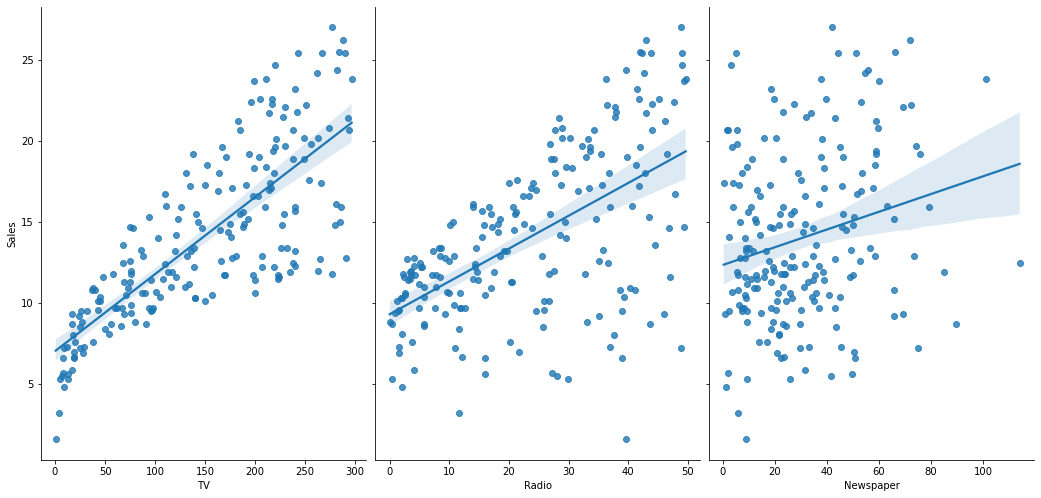

In [13]:
# visualising the relationship between the features and the responses using scatterplot
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=7,aspect=0.7,kind="reg") 
#### to increase the view we use height and the aspect function
#### we cann plot this relationship with kind with arg reg which plot it with 95% of confidense band
#there is a strong linear relationship between the sales and tv
# there is less linear relationship between sales and radio
# and a weak relationship between newspaper and sales

# Linear regression 
### Pros : no tuning required , highly interpretable , well understood
### Cons: unlikely to produce the best predictive accuracy (as it presumes a linear relationship with features and responses)

# From of linear regression
### y = z0 + z1x1 + z2x2
### y is the response
### z0 is the intesept 
### z1 is the cofficient of x1 (feature one)
### z2 is the cofficient of x2 (feature two)

# in this case 
## y = z0 + z1*TV  + z2*Radio + z3*Newspaper
### the z values are the model cofficients. these values are "learned" durind the model fitting step using the "least squares" creation. the fitted model can be used for making the predictions    were it means [ y - the R.H.S part ]  and squaring it to avoid the negative distance error

# Preparing the X and Y for sklearn 
### sklearn aspects it to be an numpy array 
### however pandas is built on top of numpy 
### therfore X can be a panda daataframe and Y can be a pandas series

In [17]:
# create a python list for feature names
feature_cols = ['TV','Radio','Newspaper']

# usse the series to select the subset of the dataframe 
X = data.loc[:,feature_cols]

# Equivalent command to do this in one line
X = data[['TV','Radio','Newspaper']]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [18]:
# Noiw for y we have to do the same thing but thid time it is a series
Y = data.Sales
Y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [19]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


# Now again splitting it into testing and traning set

In [20]:
from sklearn.model_selection import train_test_split
# the default split is 75% to train and 25% to test 
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,random_state=1)

In [22]:
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(50, 3)
(150, 3)
(50,)
(150,)


# linear reggression in sklearn

In [23]:
# import moddel
from sklearn.linear_model import LinearRegression

# instantiate
linarreg = LinearRegression()

# fit the model to the training data
linarreg.fit(X_train,Y_train)

LinearRegression()

# interpreting the model coffecients

In [25]:
print(linarreg.intercept_)
print(linarreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [28]:
# to pair the coef according to their feature_names
list(zip(feature_cols,linarreg.coef_))

[('TV', 0.046564567874150295),
 ('Radio', 0.1791581224508883),
 ('Newspaper', 0.0034504647111804065)]

##   y = 2.87 + 0.046*TV + 0.179*Radio + 0.00345*Newspaper

## how do we inpret the TV coef_ (0.046)?
## 1. for a given amount of Radio and newspaper , a "unit" increase in TV adspending is associated with a 0.046 "unit increase" in Sales

## 2. More clearly a given amount of Radio an Newspaper spending, an additional 1k dollar spent on TV ads is associated with an increase in the sales of 46.6 items

# IMP note
## this is a statement of association and not causation 
## if an increase in tv spending is associated with decrease in sales the z1 would be negative

In [30]:
y_pred = linarreg.predict(X_test)    ######################

# we need an evalution metric in order to compare our predictions with actual values
###   here the metrics.accuracy_score is not viable for continuous reggression and they are not cassiffication one  

In [31]:
# how it works 
# first define the true values and the predicted values
true = [100,50,30,20]
predicted = [90,50,50,30]

# we use the Mean Absolute Error (MAE) for the evalution matrics
https://www.google.com/search?q=mae+formula&rlz=1C1CHBF_enIN977IN977&sxsrf=AOaemvLR0DhsJ6erSA39UtQeefomessovg:1642952479462&tbm=isch&source=iu&ictx=1&vet=1&fir=0weufB6l2tu4BM%252C5XO02fiqwAdoBM%252C_&usg=AI4_-kRcfEz8OafGUAWUT7P1zIBh-npOGw&sa=X&ved=2ahUKEwiD4q73msj1AhX4SWwGHej6DyoQ9QF6BAgOEAE&cshid=1642952742253742&biw=1536&bih=754&dpr=1.25#imgrc=EIwzA1SJnDPqNM


In [32]:
# calculate the mae by hand 
print((10+0+20+10)/4)

# calculate the mae by usinf sklearn 
from sklearn import metrics
print(metrics.mean_absolute_error(true,predicted))

10.0
10.0


# Mean Squared Error MSE is the mean of squared error
https://www.google.com/search?q=mae+formula&rlz=1C1CHBF_enIN977IN977&sxsrf=AOaemvLR0DhsJ6erSA39UtQeefomessovg:1642952479462&tbm=isch&source=iu&ictx=1&vet=1&fir=0weufB6l2tu4BM%252C5XO02fiqwAdoBM%252C_&usg=AI4_-kRcfEz8OafGUAWUT7P1zIBh-npOGw&sa=X&ved=2ahUKEwiD4q73msj1AhX4SWwGHej6DyoQ9QF6BAgOEAE&cshid=1642952742253742&biw=1536&bih=754&dpr=1.25#imgrc=tg1rGHJQrzYBcM

In [33]:
print((10**2+0**2+20**2+10**2)/4)

# MSE by using sklearn
print(metrics.mean_squared_error(true,predicted))

150.0
150.0


# Root Mean squared error is a square root of mse 
https://www.google.com/search?q=mae+formula&rlz=1C1CHBF_enIN977IN977&sxsrf=AOaemvLR0DhsJ6erSA39UtQeefomessovg:1642952479462&tbm=isch&source=iu&ictx=1&vet=1&fir=0weufB6l2tu4BM%252C5XO02fiqwAdoBM%252C_&usg=AI4_-kRcfEz8OafGUAWUT7P1zIBh-npOGw&sa=X&ved=2ahUKEwiD4q73msj1AhX4SWwGHej6DyoQ9QF6BAgOEAE&cshid=1642952742253742&biw=1536&bih=754&dpr=1.25#imgrc=lS8zV5zZ4grZqM

In [38]:
import numpy as np
print(np.sqrt((10**2+0**2+20**2+10**2)/4))

print(np.sqrt(metrics.mean_squared_error(true,predicted)))
# this sligthly more than mae because it squared the errors ths increases the weight of the larger errors
# this is the best as it is interpreted in y units and also punishes arger error as mse  

12.24744871391589
12.24744871391589


In [40]:
print(np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))  
# second arg is the predicted error 
# first ags is the thing to which u wanna compare (True values)

1.404651423032896


In [41]:
# now as the tunning parameter doesnt apply on linearreggresion and i have not studied anymore reggression
# model till the time being therefore it is good for now 

# Now removing the newspaper feature_column as it literally has very less effect on the model prediction and see does it improve the quality of our prediction 

In [42]:
cols = ["TV","Radio"]

X1 = data[cols]

Y1 = data.Sales

X_train1 , X_test1 , Y_train1 ,Y_test1 = train_test_split(X1,Y1,random_state=1)

linarreg.fit(X_train1,Y_train1)

y1_pred = linarreg.predict(X_test1)

print(np.sqrt(metrics.mean_squared_error(Y_test1,y1_pred)))

1.3879034699382888


In [43]:
# The rmse decreased when we removed newspaper from the model 
#(Error is something we want to minimize ,so a lower no. for rmse is better)
#therefore we should remove the newspaper column